In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


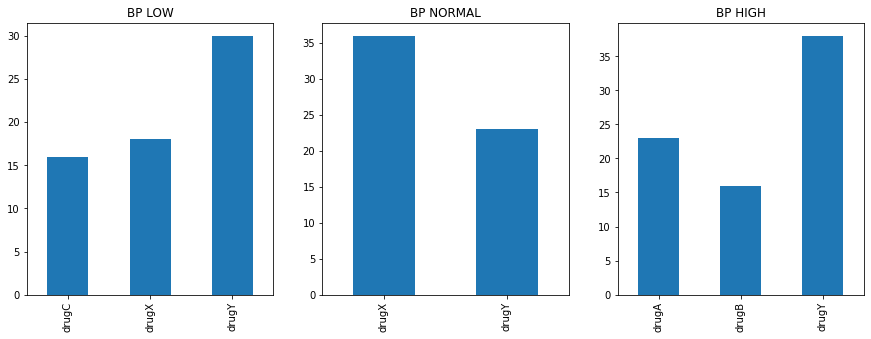

In [36]:
# df.Drug.value_counts().sort_index().plot(kind='bar')
fig, ax = plt.subplots(1,3,figsize=(15,5))
df[df.BP=='LOW'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[0],title="BP LOW")
df[df.BP=='NORMAL'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[1],title="BP NORMAL")
df[df.BP=='HIGH'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[2],title="BP HIGH")
plt.show()

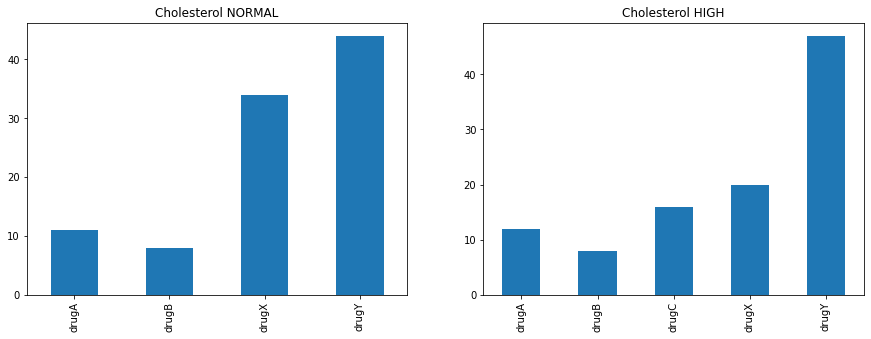

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
df[df.Cholesterol=='NORMAL'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[0],title="Cholesterol NORMAL")
df[df.Cholesterol=='HIGH'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[1],title="Cholesterol HIGH")
plt.show()

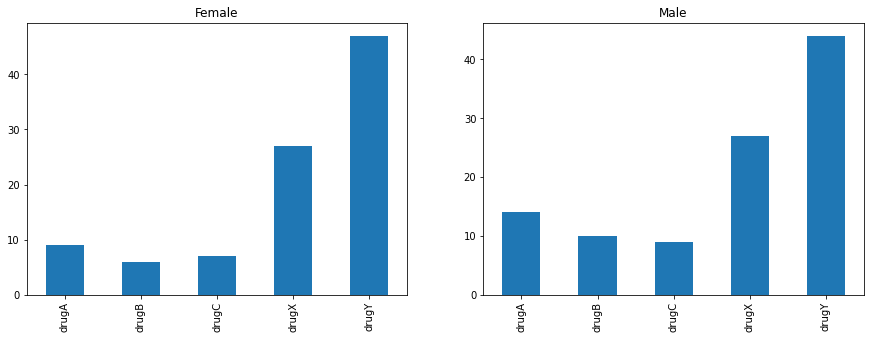

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
df[df.Sex=='F'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[0],title="Female")
df[df.Sex=='M'].Drug.value_counts().sort_index().plot(kind='bar',ax=ax[1],title="Male")
plt.show()

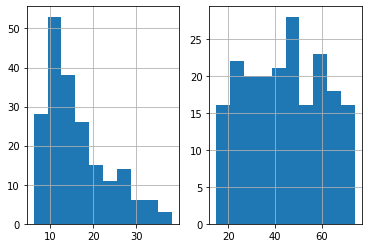

In [70]:
fig, ax = plt.subplots(1,2)
df.Age.hist(ax=ax[1])
df.Na_to_K.hist(ax=ax[0])
plt.show()

### Preprocessing

In [96]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [97]:
X = df[['Sex', 'BP', 'Cholesterol','Na_to_K']].values
y = df['Drug']

In [98]:
X[:5]

array([['F', 'HIGH', 'HIGH', 25.355],
       ['M', 'LOW', 'HIGH', 13.093],
       ['M', 'LOW', 'HIGH', 10.114],
       ['F', 'NORMAL', 'HIGH', 7.798],
       ['F', 'LOW', 'HIGH', 18.043]], dtype=object)

#### Handling Categorical Variables

In [99]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,0] = le_sex.transform(X[:,0])

le_bp = LabelEncoder()
le_bp.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,1] = le_bp.transform(X[:,1])

le_chol = LabelEncoder()
le_chol.fit(['NORMAL', 'HIGH'])
X[:,2] = le_chol.transform(X[:,2])

X[:5]

array([[0, 0, 0, 25.355],
       [1, 1, 0, 13.093],
       [1, 1, 0, 10.114],
       [0, 2, 0, 7.798],
       [0, 1, 0, 18.043]], dtype=object)

In [100]:
X

array([[0, 0, 0, 25.355],
       [1, 1, 0, 13.093],
       [1, 1, 0, 10.114],
       [0, 2, 0, 7.798],
       [0, 1, 0, 18.043],
       [0, 2, 0, 8.607],
       [0, 2, 0, 16.275],
       [1, 1, 0, 11.037],
       [1, 2, 0, 15.171],
       [1, 1, 1, 19.368],
       [0, 1, 0, 11.767],
       [0, 0, 1, 19.199],
       [1, 1, 0, 15.376],
       [0, 1, 0, 20.942],
       [0, 2, 0, 12.703],
       [0, 0, 1, 15.516],
       [1, 1, 1, 11.455],
       [1, 0, 0, 13.972],
       [1, 1, 0, 7.298],
       [0, 0, 1, 25.974],
       [1, 1, 1, 19.128],
       [1, 2, 0, 25.917],
       [1, 1, 1, 30.568],
       [0, 1, 0, 15.036],
       [0, 1, 0, 33.486],
       [0, 0, 1, 18.809],
       [1, 0, 0, 30.366],
       [0, 2, 1, 9.381],
       [0, 1, 1, 22.697],
       [1, 1, 0, 17.951],
       [0, 2, 1, 8.75],
       [1, 0, 0, 9.567],
       [1, 1, 1, 11.014],
       [0, 0, 1, 31.876],
       [1, 2, 0, 14.133],
       [1, 2, 1, 7.285],
       [1, 0, 1, 9.445],
       [1, 1, 1, 13.938],
       [0, 2, 1, 9.70

In [154]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2)

X_trainset.shape, y_trainset.shape

((160, 4), (160,))

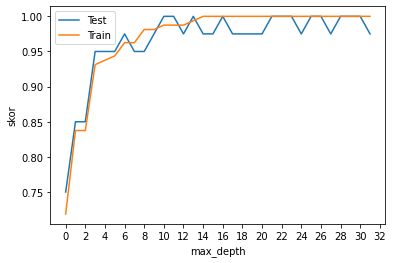

In [155]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

scores1 = []
scores2 = []


for i in range(1,33):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    tree.fit(X_trainset, y_trainset)
    
    y_hat = tree.predict(X_testset)
    score1 = accuracy_score(y_testset, y_hat)
    scores1.append(score1)
    
    y_hat = tree.predict(X_trainset)
    score2 = accuracy_score(y_trainset, y_hat)
    scores2.append(score2)
    
plt.plot(scores1, label="Test")
plt.plot(scores2, label="Train")
plt.xlabel("max_depth")
plt.ylabel("skor")
plt.xticks(list(range(0,33,2)))
plt.legend()
plt.show()

In [80]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [81]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=5)

In [88]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(max_depth=5)

In [89]:
y_hat = tree.predict(X_testset)
accuracy_score(y_testset, y_hat)

0.9333333333333333

In [90]:
for i in range(1,11):
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(X_trainset, y_trainset)
    y_hat = tree.predict(X_testset)
    score = accuracy_score(y_testset, y_hat)
    print(score)

0.9333333333333333
0.9111111111111111
0.9333333333333333
0.9111111111111111
0.9333333333333333
0.9111111111111111
0.9333333333333333
0.9111111111111111
0.9333333333333333
0.9333333333333333


In [1]:
help(sklearn)

NameError: name 'sklearn' is not defined